In [34]:
import numpy as np
import torchaudio
import torch

In [2]:
clean_path = './data/LibriSpeech/train-clean-100/19/198/19-198-0000.flac'
clean_wave, clean_rate = torchaudio.load(clean_path)

noise_path = './data/noise_datasets/urbansound8k/audio/fold1/7061-6-0-0.wav'
noise_wave, noise_rate = torchaudio.load(noise_path)

print(clean_wave.shape, clean_rate)
print(noise_wave.shape, noise_rate)

torch.Size([1, 31440]) 16000
torch.Size([2, 99225]) 44100


In [16]:
print(clean_wave)

tensor([[0.0044, 0.0033, 0.0031,  ..., 0.0047, 0.0060, 0.0060]])


In [17]:
print(len(clean_wave[0]))

31440


In [35]:
# fourier transform
N = len(clean_wave[0])  # sampling 개수

clean_ft = torch.fft.fft(clean_wave[0])
print(clean_ft)
clean_amp = 2.0/N * torch.abs(clean_ft[:N//2])
print(clean_amp)

clean_freq = torch.fft.fftfreq(N, 1/clean_rate)
clean_freq = clean_freq[:N//2]
print(clean_freq)

tensor([-2.0431+0.0000j,  0.2402-0.2589j,  0.0944+0.2297j,  ...,
        -0.6210-0.2689j,  0.0944-0.2297j,  0.2402+0.2589j])
tensor([1.2997e-04, 2.2465e-05, 1.5796e-05,  ..., 1.2112e-05, 1.0179e-05,
        1.9778e-05])
tensor([0.0000e+00, 5.0891e-01, 1.0178e+00,  ..., 7.9985e+03, 7.9990e+03,
        7.9995e+03])


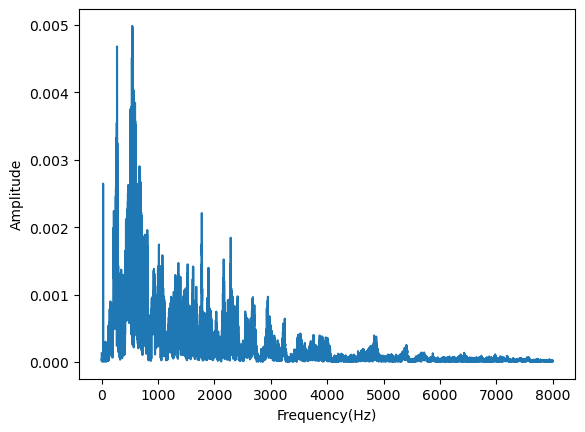

In [36]:
import matplotlib.pyplot as plt

plt.plot(clean_freq, clean_amp)
plt.xlabel("Frequency(Hz)")
plt.ylabel("Amplitude")
plt.show()

In [31]:
mixed_path = './mixed_audio_example.flac'
mixed_wave, mixed_rate = torchaudio.load(mixed_path)

print(mixed_wave.shape, mixed_rate)

torch.Size([1, 31440]) 16000


In [37]:
# fourier transform
N = len(mixed_wave[0])  # sampling 개수

mixed_ft = torch.fft.fft(mixed_wave[0])
print(mixed_ft)
mixed_amp = 2.0/N * torch.abs(mixed_ft[:N//2])
print(mixed_amp)

mixed_freq = torch.fft.fftfreq(N, 1/mixed_rate)
mixed_freq = mixed_freq[:N//2]
print(mixed_freq)

tensor([12.0005+0.0000j,  2.3415-10.7927j, -3.2992+1.9839j,  ...,
         0.6638-6.1010j, -3.2992-1.9839j,  2.3415+10.7927j])
tensor([0.0008, 0.0007, 0.0002,  ..., 0.0004, 0.0003, 0.0005])
tensor([0.0000e+00, 5.0891e-01, 1.0178e+00,  ..., 7.9985e+03, 7.9990e+03,
        7.9995e+03])


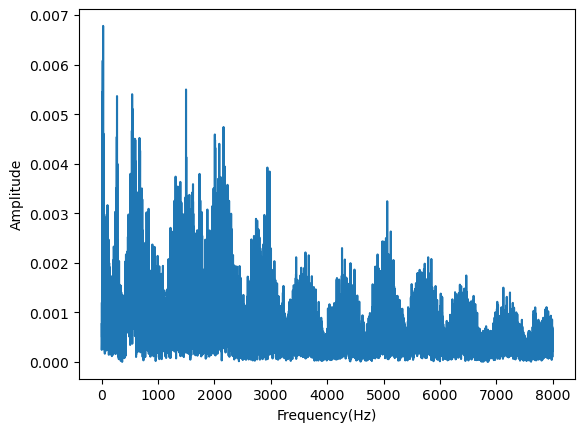

In [38]:
plt.plot(mixed_freq, mixed_amp)
plt.xlabel("Frequency(Hz)")
plt.ylabel("Amplitude")
plt.show()